In [33]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import collections
from collections import namedtuple
import builtins
import math
from TMSiSDK.file_readers import Poly5Reader
# import our library as is now
sys.path.insert(0, '../resurfemg')
import helper_functions as hf
import converter_functions as cf


config = Config()


In [173]:
new_emg_different = 'C:/Projects/20180523_225654.Data8Raw.Poly5'

In [176]:
newnow= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_15776\1367814705.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  newnow= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')


In [234]:
newnow.tail(5)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
1017531,5:39:10.680,NaN,21.080,30.873,13.892,10.627,14.831,14.831,-2.462,0.380,0.331
1017532,5:39:10.700,NaN,20.826,29.963,13.422,10.404,14.813,14.813,-2.456,0.381,0.335
1017533,5:39:10.720,NaN,20.614,28.946,12.948,10.144,14.732,14.732,-2.450,0.386,0.338
1017534,5:39:10.740,NaN,20.436,27.839,12.492,9.850,14.586,14.586,-2.451,0.385,0.339
1017535,5:39:10.760,NaN,20.271,26.659,12.057,9.527,14.380,14.380,-2.453,0.384,0.341


In [256]:
def dvrmn_csv_freq_find(file_name):
    file = pd.read_csv(file_name)
    sample_points = len(file)
    time_string = file['Time'][sample_points -1]
    seconds = float(time_string[5:10])
    minutes = float(time_string[2:4])
    hours =  int(time_string[0:1])
    sum_time = (hours*3600) + (minutes*60) + seconds 
    freq = round(sample_points/sum_time)
    return freq # 10175

In [257]:
dvrmn_csv_freq_find('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_15776\983619166.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_name)


50

In [249]:
60*60

3600

In [211]:
def dvrmn_csv_to_array(file_name):
    """
    This transformed an already preprocessed csv from the Duiverman lab into an EMG
    in the format our other functions can work on it. 
    """
    file = pd.read_csv(file_name)
    new_df = file.drop(['Events', 'Time'], axis =1)
    arrayed = np.rot90(new_df)
    arrayed = np.flipud(arrayed)
    return arrayed


In [212]:
dvrmn_csv_to_array('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_15776\2972198589.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_name)


array([[ 4.0140e+00,  4.0590e+00,  4.1170e+00, ...,  2.0614e+01,
         2.0436e+01,  2.0271e+01],
       [ 8.5080e+00,  7.9160e+00,  7.3790e+00, ...,  2.8946e+01,
         2.7839e+01,  2.6659e+01],
       [ 3.5780e+00,  3.3760e+00,  3.1840e+00, ...,  1.2948e+01,
         1.2492e+01,  1.2057e+01],
       ...,
       [-1.0000e-03,  3.0000e-03,  4.0000e-03, ..., -2.4500e+00,
        -2.4510e+00, -2.4530e+00],
       [-1.2000e-02, -6.0000e-03, -5.0000e-03, ...,  3.8600e-01,
         3.8500e-01,  3.8400e-01],
       [ 8.0000e-03,  1.5000e-02,  1.4000e-02, ...,  3.3800e-01,
         3.3900e-01,  3.4100e-01]])

In [210]:
dvrmn_csv_to_array('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_15776\3294365000.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_name)


array([[ 8.0000e-03,  1.5000e-02,  1.4000e-02, ...,  3.3800e-01,
         3.3900e-01,  3.4100e-01],
       [-1.2000e-02, -6.0000e-03, -5.0000e-03, ...,  3.8600e-01,
         3.8500e-01,  3.8400e-01],
       [-1.0000e-03,  3.0000e-03,  4.0000e-03, ..., -2.4500e+00,
        -2.4510e+00, -2.4530e+00],
       ...,
       [ 3.5780e+00,  3.3760e+00,  3.1840e+00, ...,  1.2948e+01,
         1.2492e+01,  1.2057e+01],
       [ 8.5080e+00,  7.9160e+00,  7.3790e+00, ...,  2.8946e+01,
         2.7839e+01,  2.6659e+01],
       [ 4.0140e+00,  4.0590e+00,  4.1170e+00, ...,  2.0614e+01,
         2.0436e+01,  2.0271e+01]])

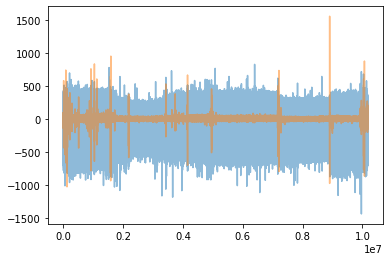

In [258]:
plt.plot(data_samples[1], alpha = 0.5)
plt.plot(data_samples[0], alpha = 0.5)

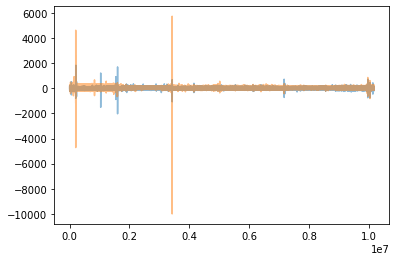

In [259]:
plt.plot(data_samples[2], alpha = 0.5)
plt.plot(data_samples[3], alpha = 0.5)

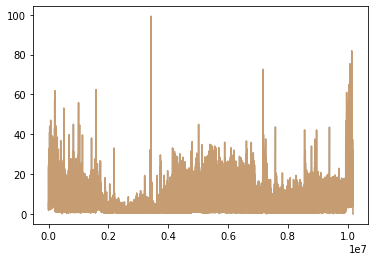

In [198]:
plt.plot(data_samples[10], alpha = 0.5)
plt.plot(data_samples[11], alpha = 0.5)

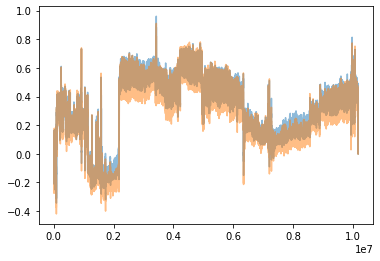

In [199]:
plt.plot(data_samples[13], alpha = 0.5)
plt.plot(data_samples[14], alpha = 0.5)

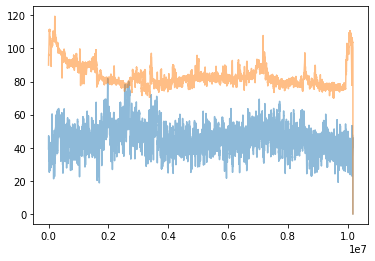

In [200]:
plt.plot(data_samples[15], alpha = 0.5)
plt.plot(data_samples[16], alpha = 0.5)

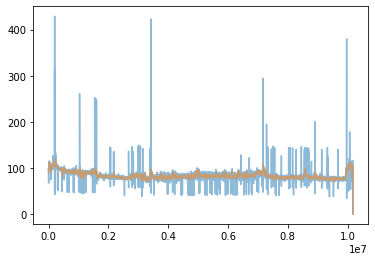

In [260]:
plt.plot(data_samples[17], alpha = 0.5)
plt.plot(data_samples[16], alpha = 0.5)

In [261]:
newnow.head(10)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
0,0:00:00.060,22:56:54,4.014,8.508,3.578,2.783,7.867,7.867,-0.001,-0.012,0.008
1,0:00:00.080,NaN,4.059,7.916,3.376,2.602,7.487,7.487,0.003,-0.006,0.015
2,0:00:00.100,NaN,4.117,7.379,3.184,2.449,7.103,7.103,0.004,-0.005,0.014
3,0:00:00.120,NaN,4.188,6.894,3.006,2.322,6.723,6.723,0.006,-0.004,0.015
4,0:00:00.140,NaN,4.272,6.453,2.842,2.223,6.347,6.347,0.002,-0.008,0.007
5,0:00:00.160,NaN,4.367,6.054,2.695,2.150,5.974,5.974,0.001,-0.010,0.003
6,0:00:00.180,NaN,4.466,5.701,2.566,2.100,5.614,5.614,0.001,-0.008,0.002
7,0:00:00.200,NaN,4.563,5.401,2.458,2.072,5.279,5.279,0.004,-0.004,0.003
8,0:00:00.220,NaN,4.654,5.146,2.376,2.061,4.977,4.977,0.008,0.000,0.004
9,0:00:00.240,NaN,4.737,4.921,2.318,2.060,4.703,4.703,0.011,0.004,0.005


In [272]:
our_sample = 'C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized/M004/009/EMG_recording.Poly5'

In [281]:
#data_emg = Poly5Reader(new_emg_different)
data_emg = Poly5Reader(our_sample)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized/M004/009/EMG_recording.Poly5
	 Number of samples:  1016512 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


In [282]:
accomanycsv.shape[0]

1017536

In [283]:
data_emg.channels

In [284]:
data_emg.samples

array([[ 3890.1965332 ,  3889.43920898,  3888.81616211, ...,
            0.        ,     0.        ,     0.        ],
       [ 1988.30883789,  1988.44311523,  1991.25256348, ...,
            0.        ,     0.        ,     0.        ],
       [-5807.49951172, -5800.28027344, -5798.38720703, ...,
            0.        ,     0.        ,     0.        ]])

one of leads is time, also pressure?

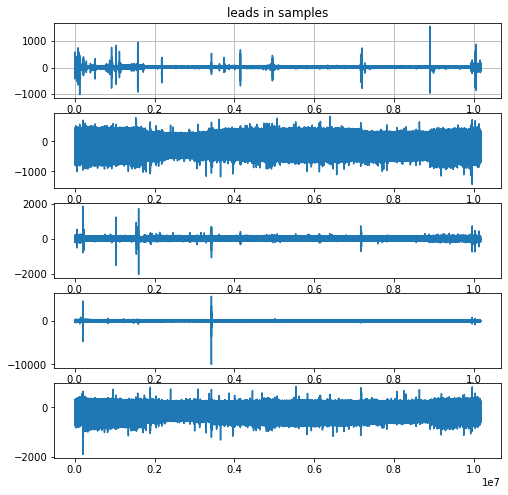

In [5]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])

# axis[5].plot(x[5])
# axis[6].plot(x[6])
# axis[7].plot(x[7])
# axis[8].plot(x[8])
# axis[9].plot(x[9])
# axis[10].plot(x[10])

# axis[11].plot(x[11])
# axis[12].plot(x[12])
# axis[13].plot(x[13])
# axis[14].plot(x[14])
# axis[15].plot(x[15])

# axis[16].plot(x[16])
# axis[17].plot(x[17])

plt.show()


In [6]:
accomanycsv= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_15776\2821689351.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  accomanycsv= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')


In [7]:
accomanycsv.head(5)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
0,0:00:00.060,22:56:54,4.014,8.508,3.578,2.783,7.867,7.867,-0.001,-0.012,0.008
1,0:00:00.080,NaN,4.059,7.916,3.376,2.602,7.487,7.487,0.003,-0.006,0.015
2,0:00:00.100,NaN,4.117,7.379,3.184,2.449,7.103,7.103,0.004,-0.005,0.014
3,0:00:00.120,NaN,4.188,6.894,3.006,2.322,6.723,6.723,0.006,-0.004,0.015
4,0:00:00.140,NaN,4.272,6.453,2.842,2.223,6.347,6.347,0.002,-0.008,0.007


In [8]:
accomanycsv.shape

(1017536, 11)

In [9]:
data_samples.shape

(18, 10175502)

In [10]:
converted = pd.DataFrame(data = data_samples)

In [11]:
converted.head(15)

,0,1,2,3,4,5,6,7,8,9,...,10175492,10175493,10175494,10175495,10175496,10175497,10175498,10175499,10175500,10175501
0,-3.898192,-5.614154,-3.809548,-1.443963,-1.021803,0.774888,5.007726,6.679644,3.018006,-2.513429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.648056,5.314520,13.854936,17.307537,16.802999,28.410530,34.248634,33.169098,24.177605,15.969131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.737297,2.730896,-7.749369,-4.913290,2.760850,0.071360,-0.602723,0.797038,1.278135,1.854848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.564402,-4.107004,-4.308214,-4.920402,-6.510462,-14.278773,-16.725796,-15.540417,-11.529875,-8.461237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5.053710,3.765554,13.764119,19.262209,17.158730,16.434097,16.073034,15.235250,16.051998,16.940401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-5.053710,3.765554,13.764119,19.262209,17.158730,16.434097,16.073034,15.235250,16.051998,16.940401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.400235,4.409757,4.419418,4.429036,4.438768,4.448578,4.458200,4.467860,4.477653,4.487574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.735417,5.704149,5.673203,5.643038,5.613090,5.583278,5.553516,5.524022,5.494696,5.465422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.551069,2.538372,2.526367,2.514214,2.502423,2.490600,2.479036,2.467052,2.455791,2.444718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.024127,2.020656,2.017514,2.015030,2.012659,2.010394,2.008344,2.006797,2.005352,2.003964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import scipy
#C:\Projects
import scipy.io as sio

In [13]:
file_name = 'C://Projects/data_sEMG_test.mat'
file =sio.loadmat(file_name, mdict=None, appendmat=True)

In [84]:
#file

In [15]:
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data_emg'])

In [85]:
#file.values()

In [17]:
file['__header__']

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 29 15:42:59 2022'

In [18]:
file['__version__']

'1.0'

In [19]:
file['__globals__']

[]

In [20]:
file['data_emg']

array([[ 0.00183105,  0.00793457,  0.0012207 , -0.00244141, -0.00427246],
       [ 0.00030518,  0.00640869,  0.00152588, -0.00183105, -0.00488281],
       [ 0.00030518,  0.00549316,  0.00091553, -0.00213623, -0.00488281],
       ...,
       [ 0.00183105,  0.        ,  0.00427246,  0.00518799, -0.00061035],
       [ 0.00305176,  0.00091553,  0.00396729,  0.00244141, -0.00244141],
       [ 0.00183105,  0.        ,  0.00335693, -0.00640869, -0.00396729]])

In [21]:
file['data_emg'].shape

(200000, 5)

In [22]:
file['data_emg'][:, 0]

array([0.00183105, 0.00030518, 0.00030518, ..., 0.00183105, 0.00305176,
       0.00183105])

we have the info that it was run at 2000 hertz for 100 seconds, 5 leads, note this file type does not seem to record the frequency of sampling

In [83]:
# %matplotlib inline
# # set up plotn
# x = file['data_emg'] # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[:, 0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[:,1])
# axis[2].plot(x[:,2])
# axis[3].plot(x[:,3])
# axis[4].plot(x[:,4])


OK, so now the question is to write something generalizable so we can have 3,5,or even 18 leads...

In [24]:
def working_pipeline_pre_entropy(our_chosen_samples): 
    cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(cut_file_data, 5, 450, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the picking step!
    emg= hf.pick_more_peaks_array(components)
    # now process it in final steps
    abs_values = abs(emg)
    final_envelope_d = hf.emg_highpass_butter(abs_values, 150, 2048)
    
        
    return final_envelope_d

In [25]:
cut_file_data = hf.bad_end_cutter_for_samples(file['data_emg'], percent_to_cut=3, tolerance_percent=5)

../resurfemg\helper_functions.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  difference = abs(last_half_means - last_part_means)/last_half_means
../resurfemg\helper_functions.py:217: RuntimeWarning: invalid value encountered in double_scalars
  difference = abs(last_half_means - last_part_means)/last_half_means


In [26]:
cut_file_data.shape

(200000, 4)

The above did not work- it cuts the last lead. Maybe we need tomchange the shape with a roll, lets compare to our typical file

In [27]:
typical_file_chosen = '../not_pushed/topspin_data_anonymized/M001/001/EMG_recording.Poly5'

In [28]:
data_emg = Poly5Reader(typical_file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  ../not_pushed/topspin_data_anonymized/M001/001/EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


In [29]:
data_samples.shape

(3, 174720)

In [30]:
file['data_emg'].shape

(200000, 5)

There we go, we must resolve this so we get the same shaped array before we process it.

In [153]:
def matlab5_jkmn_to_array(file_name):
    file =sio.loadmat(file_name, mdict=None, appendmat=False)
    arrays = np.rot90(file['data_emg'])
    return arrays

In [154]:
output = cf.matlab5_jkmn_to_array(file_name)

In [113]:
output

array([[ 0.00183105,  0.00030518,  0.00030518, ...,  0.00183105,
         0.00305176,  0.00183105],
       [ 0.00793457,  0.00640869,  0.00549316, ...,  0.        ,
         0.00091553,  0.        ],
       [ 0.0012207 ,  0.00152588,  0.00091553, ...,  0.00427246,
         0.00396729,  0.00335693],
       [-0.00244141, -0.00183105, -0.00213623, ...,  0.00518799,
         0.00244141, -0.00640869],
       [-0.00427246, -0.00488281, -0.00488281, ..., -0.00061035,
        -0.00244141, -0.00396729]])

In [119]:
def csv_from_jkmn_to_array(file_name):
    file = pd.read_csv(file_name)
    new_df = (file.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'lead.{i+1}' for i in range(file.shape[1])], axis=1))

    arrayed = np.rot90(new_df)
    output_copy = arrayed.copy()
    arrayed[4] = output_copy[0]
    arrayed[3] = output_copy[1]
    arrayed[1] = output_copy[3]
    arrayed[0] = output_copy[4]
    return arrayed

In [120]:
file_name2= 'C:/Projects/ReSurfEMG/open_work/hidden/data_sEMG_test.csv'
output2 = csv_from_jkmn_to_array(file_name2)

In [121]:
print(type(output[0][12]))

<class 'numpy.float64'>


In [142]:
print(type(output3[0][5]))

<class 'float'>


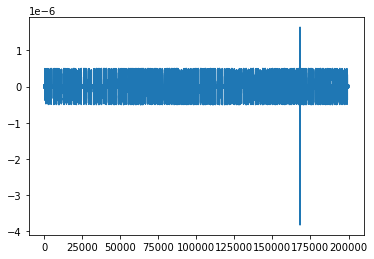

In [150]:
#plt.plot(output[0])
output3 = np.array(output2).astype('float64')
plt.plot(output3[0]- output[0])

In [149]:
output[0] - output3[0]

array([-4.53125e-08, -4.21875e-09, -4.21875e-09, ..., -4.53125e-08,
       -4.21875e-08, -4.53125e-08])

In [157]:
output[:,:1000]

array([[-0.00427246, -0.00488281, -0.00488281, ..., -0.00213623,
        -0.00610352, -0.00854492],
       [-0.00244141, -0.00183105, -0.00213623, ..., -0.00274658,
        -0.00274658, -0.00335693],
       [ 0.0012207 ,  0.00152588,  0.00091553, ...,  0.00305176,
         0.00366211,  0.00213623],
       [ 0.00793457,  0.00640869,  0.00549316, ..., -0.00152588,
        -0.00061035, -0.0012207 ],
       [ 0.00183105,  0.00030518,  0.00030518, ..., -0.00061035,
        -0.0012207 ,  0.        ]])

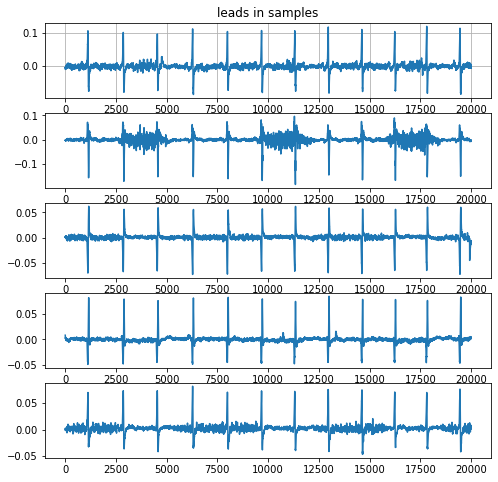

In [160]:
%matplotlib inline
# set up plotn
x = output[:,:20000]# data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])

In [89]:
# %matplotlib inline
# # set up plotn
# x = output # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])
# axis[2].plot(x[2])
# axis[3].plot(x[3])
# axis[4].plot(x[4])

In [90]:
# output_copy= output.copy()
# #output_copy
# output[4] = output_copy[0]
# output[3] = output_copy[1]
# output[1] = output_copy[3]
# output[0] = output_copy[4]
# x = output # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])
# axis[2].plot(x[2])
# axis[3].plot(x[3])
# axis[4].plot(x[4])

In [40]:
list(range(output.shape[0]))

[0, 1, 2, 3, 4]

In [59]:

def compute_ICA_two_comp(emg_samples):
    """A function that performs an independant component analysis
    (ICA) meant for EMG data that includes stacked three arrays.

    :param emg_samples: Original signal array with three layers
    :type emg_samples: ~numpy.ndarray

    :returns: Two arrays of independent components (ECG-like and EMG)
    :rtype: ~numpy.ndarray
    """
    print(emg_samples[0])
    X = np.c_[emg_samples[0], emg_samples[2]]
    print(X)
    ica = FastICA(n_components=2)
    S = ica.fit_transform(X)
    component_0 = S.T[0]
    component_1 = S.T[1]
    return component_0, component_1


In [60]:
hoho = compute_ICA_two_comp(output)
hoho

[-0.00427246 -0.00488281 -0.00488281 ... -0.00061035 -0.00244141
 -0.00396729]
[[-0.00427246  0.0012207 ]
 [-0.00488281  0.00152588]
 [-0.00488281  0.00091553]
 ...
 [-0.00061035  0.00427246]
 [-0.00244141  0.00396729]
 [-0.00396729  0.00335693]]


C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


(array([3.77355490e-04, 4.18739407e-04, 4.34125426e-04, ...,
        5.96383812e-06, 1.60887626e-04, 2.98965960e-04]),
 array([-4.85976396e-05, -7.80476846e-05, -1.42717257e-05, ...,
        -3.82105041e-04, -3.42903258e-04, -2.73032463e-04]))

In [165]:
from sklearn.decomposition import FastICA
def compute_ICA_two_comp_selective(emg_samples, use_all_leads=True, desired_leads=[0,2]):
    """A function that performs an independant component analysis
    (ICA) meant for EMG data that includes stacked arrays,
    there should be at least 3 arrays but there can be more.

    :param emg_samples: Original signal array with three or more layers
    :type emg_samples: ~numpy.ndarray

    :returns: Two arrays of independent components (ECG-like and EMG)
    :rtype: ~numpy.ndarray
    """
    if use_all_leads == True:
        all_component_numbers = list(range(emg_samples.shape[0]))
    else:
        all_component_numbers = desired_leads
    list_to_c = []
    for i in all_component_numbers:
        print(i)
        list_to_c.append(emg_samples[i])
    #print( list_to_c)    
    X = np.column_stack(list_to_c)
    #print(X)
    
    ica = FastICA(n_components=2)
    S = ica.fit_transform(X)
    component_0 = S.T[0]
    component_1 = S.T[1]
    return component_0, component_1

In [166]:
output.shape

(5, 200000)

In [169]:
hulu = compute_ICA_two_comp_new(output, use_all_leads=False,desired_leads=[1,3] )

1
3


C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [172]:
i= 10
if i not in [1,2,3]:
    print(i)

10


In [76]:
a = np.array((1,2,3))

b = np.array((2,3,4))
c = np.array((2,6,4))

np.column_stack((a,b,c))

array([[1, 2, 2],
       [2, 3, 6],
       [3, 4, 4]])

In [82]:
# %matplotlib inline
# # set up plotn
# x = hulu # data_samples
# fig, axis = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])